In [1]:
'''THis block of code pre processes the data'''
from nltk.stem import WordNetLemmatizer
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize,sent_tokenize

import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Data_mesh_csv.csv'

# Read the TSV file and convert it to a DataFrame
df = pd.read_csv(file_path, delimiter=',')
df

,Filename,Content,Publisher
0,Breaking_Down_Data_Silos_Data_Mesh_to_Achieve_...,chieve \nEffective Aggregation in Data Localiz...,IEEE
1,Decentralized_Data_Governance_as_Part_of_a_Dat...,"pproaches \n Arif Wider 1,2 , Sumedha Verma ...",IEEE
2,Enterprise_Data_Strategy_A_Decentralized_Data_...,Decentralized Data Mesh\nApproach\nVijay Kuma...,IEEE
3,Finding_Your_Way_Through_the_Jungle_of_Big_Dat...,"rchitectures\nTorsten Priebe, Sebastian Neumai...",IEEE
4,978-1-4842-9253-2_1,"\nWhen you look back in time, data architectur...",Springer
5,978-1-4842-9253-2_10,\nIn this chapter we provide a high-level over...,Springer
6,978-1-4842-9253-2_11,\nIn Chapter 1 we saw that a Data Fabric archi...,Springer
7,978-1-4842-9253-2_12,"\nIn this chapter, we look at the intersection...",Springer
8,978-1-4842-9253-2_13,"to Metadata Management\nIn the digital era, e...",Springer
9,978-1-4842-9253-2_14,\nApplying AI to metadata management and intel...,Springer


In [3]:
# Load stop words from NLTK library
nltk.download("stopwords")
nltk_stop_words = set(stopwords.words('english'))
print("Number of stop words from NLTK:", len(nltk_stop_words))

# Load stop words from CSV file into a DataFrame with the appropriate encoding
csv_file_path = "Data_mesh_words.csv"
words_df = pd.read_csv(csv_file_path, header=None, names=["stopword"], encoding="ISO-8859-1")
custom_stop_words = set(map(str.lower, words_df["stopword"]))

# Combine stop words from both sources
stop_words = nltk_stop_words.union(custom_stop_words)

# Add words from CSV file to stop_words set
with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    # Skip header
    next(reader, None)
    # Add words to stop_words set
    for row in reader:
        word = row[0].lower().strip()
       
        stop_words.add(word)

Number of stop words from NLTK: 179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
words_to_check = ['http', 'com', 'author','license' ]

# Check if each word is in stop_words, and if not, add it
for word in words_to_check:
    if word not in stop_words:
        print(f"Adding '{word}' to stop_words")
        stop_words.add(word)

# Print the updated stop_words set
print("Updated stop words set:", stop_words, len(stop_words))

Updated stop words set: {'between', 'him', 'kayem', 'detection', 'weren', 'm', 'off', 'al', 'after', 'er', 'challenge\xa0', 'until', 'cient', 'term', 'rule', 'why', 'schultze', "hasn't", 'needn', 'yourself', 'doi', 'more', 'url', 'ingolstadt', 'tnum', 'background', 'my', "haven't", 'manuscript', 'dehghani', "shan't", 'ibm', 'figure', 'so', 'there', 'interviewee', 'hcist', 'published', "didn't", 'fig', 'up', 'internet', 'management', 'hub', 'factor', "needn't", 'onlinelibrary', 'addressed', 'she', 'than', 'mightn', 'interview', 'what', "she's", 'y', 'hasn', 'any', 'doesn', 'project', 'nor', 'me', 'on', 'herself', 'its', 'note', 'model', 'her', 'conference', 'hu', 'had', 'governance', 'di', 'lncs', 'khalil', 'myself', 'podlesny', 'comparative', 'year\xa0', 'which', 'while', 'araãºjo', 'by', 'below', 'to', 'wilfr\xa0', 'we', 'each', 'were', 'ain', 'review', 'using', 'over', 'does', "don't", 'organization', 'system', 'analysis', 'portugal', ' factor', 'being', 'shan', 'doing', 'can', "were

In [5]:
def clean_text(text):

    nltk.download('wordnet')
    
    # Remove HTML tags and non-English characters
    text = re.sub(r"<[^>]+>", "", str(text))
    text = re.sub(r"[^A-Za-zÀ-ž ]", " ", str(text))

    # Tokenize and convert to lowercase
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    # Remove single characters and numbers
    words_filtered = [word for word in words_tokens_lower if len(word) > 1 and not word.isnumeric()]

    # Remove stop words
    words_filtered = [word for word in words_filtered if word not in stop_words]

    # Lemmatize words
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

    # Join the words back into a string
    text_clean = " ".join(words_lemmatized)
    return text_clean


In [6]:
pdf_data = df.dropna(axis = 0, how = 'any', inplace = False)
    
# pdf_data = df.copy()
# drop_nan(pdf_data)
pdf_data['Content'] = pdf_data['Content'].apply(clean_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]    

In [7]:
pdf_data

,Filename,Content,Publisher
0,Breaking_Down_Data_Silos_Data_Mesh_to_Achieve_...,chieve effective aggregation data localization...,IEEE
1,Decentralized_Data_Governance_as_Part_of_a_Dat...,pproaches arif wider sumedha verma atif akhtar...,IEEE
2,Enterprise_Data_Strategy_A_Decentralized_Data_...,decentralized data vijay kumar butte sujata bu...,IEEE
3,Finding_Your_Way_Through_the_Jungle_of_Big_Dat...,rchitectures torsten priebe sebastian neumaier...,IEEE
4,978-1-4842-9253-2_1,look back data architecture developed response...,Springer
5,978-1-4842-9253-2_10,provide high overview data fabric data evoluti...,Springer
6,978-1-4842-9253-2_11,saw data fabric architecture evolution previou...,Springer
7,978-1-4842-9253-2_12,look intersection two initiative digital trans...,Springer
8,978-1-4842-9253-2_13,metadata digital era enterprise know aspect da...,Springer
9,978-1-4842-9253-2_14,applying ai metadata intelligent cataloging da...,Springer


c:\Temp\ipykernel_8880\2356747472.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20), palette='viridis')


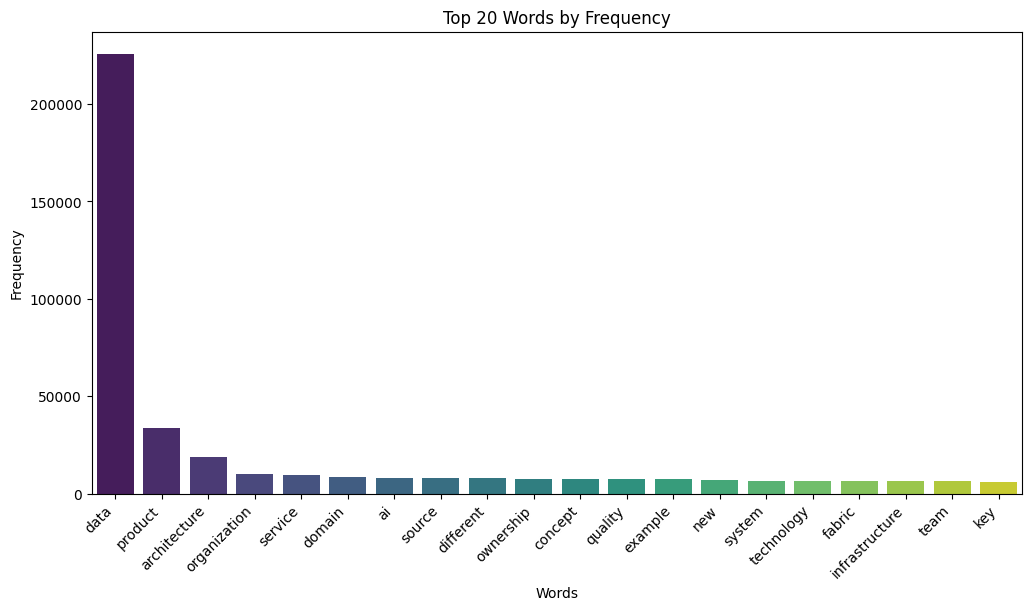

In [10]:
# Assuming 'pdf_content' column contains the cleaned text
text_combined = ' '.join(pdf_data['Content'])

# Tokenize the text
tokens = word_tokenize(text_combined)

# Count the frequency of each word
word_freq = nltk.FreqDist(tokens)

# Create a DataFrame from the frequency distribution
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top N words by frequency in a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(20), palette='viridis')
plt.title('Top 20 Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
pdf_data

,Filename,Content,Publisher
0,Breaking_Down_Data_Silos_Data_Mesh_to_Achieve_...,chieve effective aggregation data localization...,IEEE
1,Decentralized_Data_Governance_as_Part_of_a_Dat...,pproaches arif wider sumedha verma atif akhtar...,IEEE
2,Enterprise_Data_Strategy_A_Decentralized_Data_...,decentralized data vijay kumar butte sujata bu...,IEEE
3,Finding_Your_Way_Through_the_Jungle_of_Big_Dat...,rchitectures torsten priebe sebastian neumaier...,IEEE
4,978-1-4842-9253-2_1,look back data architecture developed response...,Springer
5,978-1-4842-9253-2_10,provide high overview data fabric data evoluti...,Springer
6,978-1-4842-9253-2_11,saw data fabric architecture evolution previou...,Springer
7,978-1-4842-9253-2_12,look intersection two initiative digital trans...,Springer
8,978-1-4842-9253-2_13,metadata digital era enterprise know aspect da...,Springer
9,978-1-4842-9253-2_14,applying ai metadata intelligent cataloging da...,Springer


In [12]:
csv_filename = 'Data_mesh_cleaned.csv'

# Save the DataFrame to a CSV file
pdf_data.to_csv(csv_filename, index=False)

In [13]:
word_freq_df.head(20)

,Word,Frequency
3,data,225906
158,product,33799
40,architecture,18899
53,organization,9985
303,service,9728
157,domain,8696
1464,ai,8212
413,source,7948
29,different,7841
320,ownership,7645
